In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sb
import os
%matplotlib inline
plt.style.use('ggplot')

In [73]:
def load_dots(input, start, n, skip):
    dots = []
    count = 0
    with open(input) as f:
        for line in f:
            try:
                val = (float(line)-start)/1e6
                if val < skip: continue
                dots.append(val)
                count = count + 1
                if count > n: break
                if count % (n/5) == 0: print str(count) + "... "
            except:
                pass
    yaxis = np.ones(len(dots))*[random.random() for _ in xrange(len(dots))]                
    return dots, yaxis

def get_first_timestamp(files):
    start = float("inf")
    for file in files:
        with open(file) as f:
            try:
                t = float(f.readline())
                if t < start: start = t
            except:
                pass
    return start

def make_dots(ax, n, samples, client0, client1):
    start = get_first_timestamp([client0, client1])
    
    c0, y = load_dots(client0, start, n, skip)
    plt.scatter(c0, y, lw = 0, s=3)
    
    c1, y = load_dots(client1, start, n, skip)
    plt.scatter(c1, -1*y, lw = 0, s=3, color='red')
    

#ax = plt.figure().add_subplot(111)
#make_dots(ax, 10000,
#          "reqdots-run-foreground-issdm-24-reqs-issdm-24.1477001295.1", 
#          "reqdots-run-foreground-issdm-27-reqs-issdm-27.1477001295.1")
#ax.set_xlim(0, 100)

20000... 
40000... 
60000... 
80000... 
100000... 
20000... 
40000... 
60000... 
80000... 
100000... 


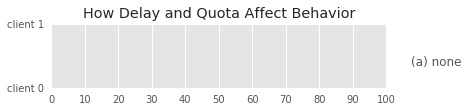

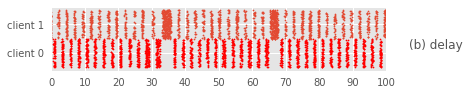

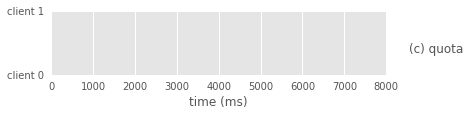

In [74]:
fig = plt.figure()
ax = plt.figure().add_subplot(311)
samples = 100000
skip = 10000
make_dots(ax, samples, skip, 
          "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1",
          "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1")
ax.set_xlim(11900, 12000)
plt.yticks([-0.5, 0.5], ["client 0", "client 1"], rotation='horizontal')
plt.xticks(range(11900, 12001, 10), range(0, 110, 10))
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("(a) none", fontsize=12, rotation=0, labelpad=50)
ax.set_title("How Delay and Quota Affect Behavior")
plt.savefig('capdelay-quota-behavior-a.png', dpi=300, bbox_inches='tight')

ax = plt.figure().add_subplot(312)
samples = 100000
skip = 11500
make_dots(ax, samples, skip, 
          "../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client0-issdm-24.1477031213.1",
          "../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client1-issdm-24.1477031214.1")
ax.set_xlim(11900, 12000)
ax.set_yticks([])
plt.xticks(range(11900, 12001, 10), range(0, 110, 10))
plt.yticks([-0.5, 0.5], ["client 0", "client 1"], rotation='horizontal')
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("(b) delay", fontsize=12, rotation=0, labelpad=50)
plt.savefig('capdelay-quota-behavior-b.png', dpi=300, bbox_inches='tight')

ax = plt.figure().add_subplot(313)
samples = 1000000
skip = 10000
make_dots(ax, samples, skip, 
          "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1",
          "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1")
ax.set_xlim(10000, 18000)
ax.set_yticks([])
plt.xticks(range(10000, 18001, 1000), range(0, 9000, 1000))
plt.yticks([-0.5, 0.5], ["client 0", "client 1"], rotation='horizontal')
ax.set_xlabel("time (ms)")
ax2 = ax.twinx()
ax2.set_yticks([])
ax2.set_ylabel("(c) quota", fontsize=12, rotation=0, labelpad=50)

plt.savefig('capdelay-quota-behavior-c.png', dpi=300, bbox_inches='tight')

In [ ]:

        
        

df1 = pd.read_csv("../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1")
df2 = pd.read_csv("../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1")
df = pd.DataFrame(columns=('client0', 'client1'))
df['client0'] = df1['ts']
df['client1'] = df2['ts']                  

df['latency client 0'] = df.client0 - df.client0.shift(1)
time = df['client0'].max() - df['client0'].min()
nreq = float(len(df.index))
print "NONE"
print "client0 thruput=", (nreq/time)*1000000000
print "client0 latency=", df['latency client 0'].max()
print "client0 errorsz=", df['latency client 0'].std()
df['latency client 1'] = df.client1 - df.client1.shift(1)
time = df['client1'].max() - df['client1'].min()
print "client1 thruput=", (nreq/time)*1000000000
print "client1 latency=", df['latency client 1'].max()
print "client1 errorsz=", df['latency client 1'].std()
          
df1 = pd.read_csv("../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client0-issdm-24.1477031213.1",)
df2 = pd.read_csv("../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client1-issdm-24.1477031214.1")
df = pd.DataFrame(columns=('client0', 'client1'))
df['client0'] = df1['ts']
df['client1'] = df2['ts']  
df['latency client 0'] = df.client0 - df.client0.shift(1)
df['latency client 0'].max()
time = df['client0'].max() - df['client0'].min()
nreq = float(len(df.index))
print "DELAY"
print "client0 thruput=", (nreq/time)*1000000000
print "client0 latency=", df['latency client 0'].max()
print "client0 errorsz=", df['latency client 0'].std()
df['latency client 1'] = df.client1 - df.client1.shift(1)
time = df['client1'].max() - df['client1'].min()
print "client1 thruput=", (nreq/time)*1000000000
print "client1 latency=", df['latency client 1'].max()
print "client1 errorsz=", df['latency client 1'].std()

df1 = pd.read_csv("../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1")
df2 = pd.read_csv("../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1")
df = pd.DataFrame(columns=('client0', 'client1'))
df['client0'] = df1['ts']
df['client1'] = df2['ts']  
df['latency client 0'] = df.client0 - df.client0.shift(1)
df['latency client 0'].max()
time = df['client0'].max() - df['client0'].min()
nreq = float(len(df.index))
print "QUOTA"
print "client0 thruput=", (nreq/time)*1000000000
print "client0 latency=", df['latency client 0'].max()
print "client0 errorsz=", df['latency client 0'].std()
df['latency client 1'] = df.client1 - df.client1.shift(1)
time = df['client1'].max() - df['client1'].min()
print "client1 thruput=", (nreq/time)*1000000000
print "client1 latency=", df['latency client 1'].max()
print "client1 errorsz=", df['latency client 1'].std()

In [111]:
def parse_client(path):
    for word in os.path.basename(path).split('-'):
        if 'client' in word and 'same' not in word:
            return word

def stats(label, clients):
    df = pd.DataFrame(columns=clients)
    print label
    for client in clients:
        data = pd.read_csv(client)
        client = parse_client(client)        
        df[client] = data['ts']
        df['latency-' + client] = df[client] - df[client].shift(1)
        time = df[client].max() - df[client].min()
        nreq = float(len(df.index))
        tput = int((nreq/time)*1000000000)
        print client, " thruput=", tput, "\tlatency=", df['latency-'+client].max(), "\tlat.error=", df[client].std()
        
client0 = "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1"
client1 = "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1"
stats("NONE", [client0, client1])

client0 = "../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client0-issdm-24.1477031213.1"
client1 = "../results-reqdots-sameclient-capdelay-0.00048828125/reqdots-sameclient-capdelay-0.00048828125-run-foreground-issdm-24-reqs-client1-issdm-24.1477031214.1"
stats("DELAY", [client0, client1])

client0 = "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1"
client1 = "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1"
stats("QUOTA", [client0, client1])


 NONE
client0  thruput= 32989 	latency= 13983518.0 	lat.error= 9611428440.07
client1  thruput= 33675 	latency= 13291020.0 	lat.error= 9284562920.49
DELAY
client0  thruput= 30909 	latency= 12909150.0 	lat.error= 9625222296.28
client1  thruput= 31428 	latency= 13490190.0 	lat.error= 9268438475.16
QUOTA
client0  thruput= 90944 	latency= 753301288.0 	lat.error= 6783714191.02
client1  thruput= 133558 	latency= 735803596.0 	lat.error= 4176230159.91
